In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('E:\Pandas\height-weight (4).csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


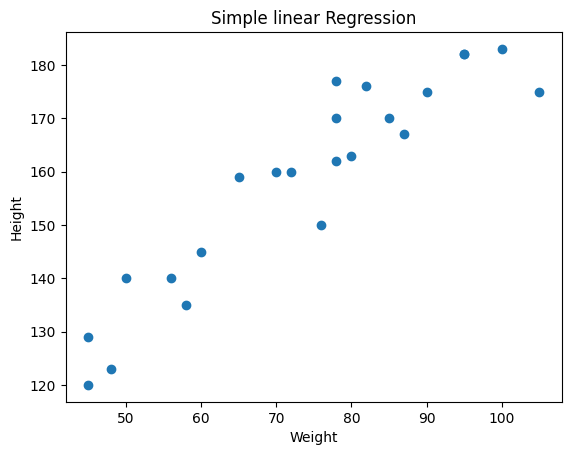

In [9]:
plt.scatter(x=df['Weight'],y=df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Simple linear Regression')
plt.show()

In [10]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [11]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [12]:
x = df[['Weight']]
y = df['Height']

In [13]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [14]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

In [18]:
y_train.shape,y_test.shape

((18,), (5,))

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train_scale = scaler.fit_transform(x_train)

In [22]:
x_test_scale = scaler.transform(x_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regrassor = LinearRegression()

In [25]:
regrassor.fit(x_train_scale,y_train)

LinearRegression()

In [26]:
regrassor.intercept_

157.5

In [27]:
regrassor.coef_

array([17.03440872])

In [28]:
y_pred = regrassor.predict(x_test_scale)

In [29]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [30]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [31]:
from sklearn.metrics import r2_score

In [32]:
r = r2_score(y_test,y_pred)

In [33]:
r

0.776986986042344

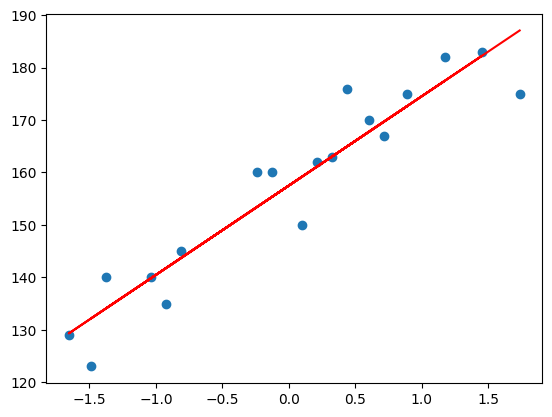

In [39]:
plt.scatter(x_train_scale,y_train)
plt.plot(x_train_scale,regrassor.predict(x_train_scale),'r')
plt.show()

In [40]:
1-(1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

In [43]:
x_test.shape[1]

1

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081
